<a href="https://colab.research.google.com/github/sachinprabhu007/ML-Expriments/blob/master/Keras_Sequential_Model_imdb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np

from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:

# import data set
from keras.datasets import imdb

(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 3s 0us/step


In [3]:
#Check train and test data
print(train_data[0])
print(train_labels[0])

#Check max number of words in each review
max([max(sequence) for sequence in train_data])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


9999

In [4]:
#Decode words in review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

1646592/1641221 [==============================] - 1s 1us/step


"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

In [0]:
#One Hot Encoding manually of review words
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [0]:
#Vectorize the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
#Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [0]:

#Define the model
model = Sequential()

model.add(Dense(16, activation = 'relu', input_shape= (10000,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
#Compile the model

model.compile(optimizer= 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

#cross entropy generally works well when dealing with probabilities as outputs

In [0]:
#Create a validation set from training

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
#Fit the model

fit_model = model.fit(partial_x_train,partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

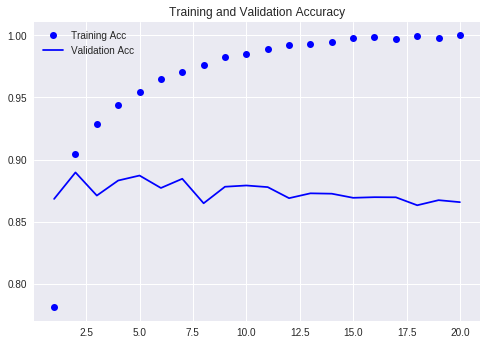

In [12]:
#Plot training and validation accuracy

import matplotlib.pyplot as plt

acc = fit_model.history['acc']
val_acc = fit_model.history['val_acc']
loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.5735 - acc: 0.7909 - val_loss: 0.4506 - val_acc: 0.8683
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3787 - acc: 0.8956 - val_loss: 0.3670 - val_acc: 0.8842
Epoch 3/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.3017 - acc: 0.9185 - val_loss: 0.3420 - val_acc: 0.8876
Epoch 4/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2646 - acc: 0.9290 - val_loss: 0.3434 - val_acc: 0.8814
Epoch 5/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2396 - acc: 0.9393 - val_loss: 0.3323 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2243 - acc: 0.9451 - val_loss: 0.3600 - val_acc: 0.8780
Epoch 7/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.2116 - acc: 0.9495 - val_loss: 0.3525 - va

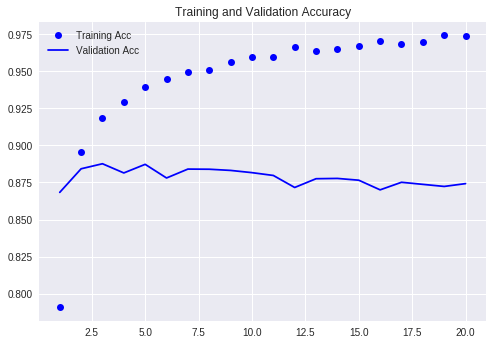

In [13]:
#model using regularizer 

from keras import regularizers
model = Sequential()

#Every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient value
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,))) 
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

fit_model = model.fit(partial_x_train,partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val,y_val))

acc = fit_model.history['acc']
val_acc = fit_model.history['val_acc']
loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.6244 - acc: 0.6509 - val_loss: 0.5021 - val_acc: 0.8477
Epoch 2/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.4962 - acc: 0.7808 - val_loss: 0.4042 - val_acc: 0.8703
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.4142 - acc: 0.8426 - val_loss: 0.3345 - val_acc: 0.8807
Epoch 4/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.3542 - acc: 0.8711 - val_loss: 0.3016 - val_acc: 0.8878
Epoch 5/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2968 - acc: 0.8965 - val_loss: 0.2978 - val_acc: 0.8840
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2670 - acc: 0.9085 - val_loss: 0.3080 - val_acc: 0.8784
Epoch 7/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2366 - acc: 0.9206 - val_loss: 0.2796 - 

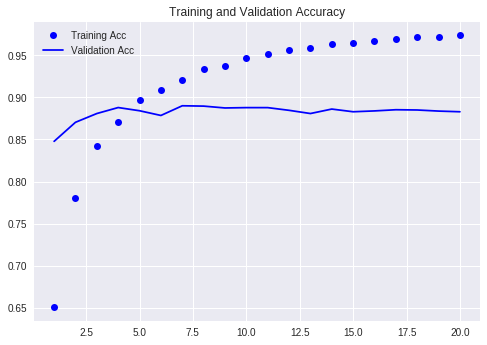

In [14]:
#model using dropout 

from keras.layers import Dropout

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

fit_model = model.fit(partial_x_train,partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val,y_val))

acc = fit_model.history['acc']
val_acc = fit_model.history['val_acc']
loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()